In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions
from keras.preprocessing.image import ImageDataGenerator
import keras

In [2]:
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]

train_path = './Dataset/train/'
test_path = './Dataset/test/'

inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in inception.layers:
    layer.trainable = False
    
folders = glob('./Dataset/train/*')

In [5]:
folders

['./Dataset/train\\ADONIS',
 './Dataset/train\\AFRICAN GIANT SWALLOWTAIL',
 './Dataset/train\\AMERICAN SNOOT',
 './Dataset/train\\AN 88',
 './Dataset/train\\APPOLLO',
 './Dataset/train\\ARCIGERA FLOWER MOTH',
 './Dataset/train\\ATALA',
 './Dataset/train\\ATLAS MOTH',
 './Dataset/train\\BANDED ORANGE HELICONIAN',
 './Dataset/train\\BANDED PEACOCK',
 './Dataset/train\\BANDED TIGER MOTH',
 './Dataset/train\\BECKERS WHITE',
 './Dataset/train\\BIRD CHERRY ERMINE MOTH',
 './Dataset/train\\BLACK HAIRSTREAK',
 './Dataset/train\\BLUE MORPHO',
 './Dataset/train\\BLUE SPOTTED CROW',
 './Dataset/train\\BROOKES BIRDWING',
 './Dataset/train\\BROWN ARGUS',
 './Dataset/train\\BROWN SIPROETA',
 './Dataset/train\\CABBAGE WHITE',
 './Dataset/train\\CAIRNS BIRDWING',
 './Dataset/train\\CHALK HILL BLUE',
 './Dataset/train\\CHECQUERED SKIPPER',
 './Dataset/train\\CHESTNUT',
 './Dataset/train\\CINNABAR MOTH',
 './Dataset/train\\CLEARWING MOTH',
 './Dataset/train\\CLEOPATRA',
 './Dataset/train\\CLODIUS PARNAS

In [6]:
len(folders)

100

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('./Dataset/train/',
                                                target_size = (224, 224),
                                                batch_size = 16,
                                                class_mode = 'categorical')

Found 12639 images belonging to 100 classes.


In [13]:
validation_set = valid_datagen.flow_from_directory('./Dataset/valid/',
                                                  target_size = (224, 224),
                                                  batch_size = 16,
                                                  class_mode = 'categorical')

Found 500 images belonging to 100 classes.


In [14]:
test_set = test_datagen.flow_from_directory('./Dataset/test/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 500 images belonging to 100 classes.


In [15]:
# training_set[0]

In [16]:
r = model.fit_generator(
    training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\arghy\AppData\Local\Temp\ipykernel_9072\960267324.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
790/790 [==============================] - 1408s 2s/step - loss: 13.1120 - accuracy: 0.5380 - val_loss: 8.4627 - val_accuracy: 0.7100
Epoch 2/10
790/790 [==============================] - 1445s 2s/step - loss: 7.8091 - accuracy: 0.7450 - val_loss: 10.4829 - val_accuracy: 0.7020
Epoch 3/10
790/790 [==============================] - 1769s 2s/step - loss: 6.3831 - accuracy: 0.8008 - val_loss: 8.0984 - val_accuracy: 0.7940
Epoch 4/10
790/790 [==============================] - 1343s 2s/step - loss: 5.8601 - accuracy: 0.8286 - val_loss: 8.3191 - val_accuracy: 0.8180
Epoch 5/10
790/790 [==============================] - 1361s 2s/step - loss: 5.2034 - accuracy: 0.8526 - val_loss: 9.5181 - val_accuracy: 0.8180
Epoch 6/10
790/790 [==============================] - 1345s 2s/step - loss: 4.6201 - accuracy: 0.8683 - val_loss: 9.6422 - val_accuracy: 0.8140
Epoch 7/10
790/790 [==============================] - 1352s 2s/step - loss: 4.5353 - accuracy: 0.8784 - val_loss: 10.5229 - val_accura

In [17]:
from tensorflow.keras.models import load_model

model.save('butterfly_classification_inception.h5')

In [18]:
from keras.utils import load_img, img_to_array

In [19]:
y_pred = model.predict(test_set)

32/32 [==============================] - 53s 2s/step


In [20]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([89, 70,  6, 39, 50, 77, 83, 31, 90, 29, 62, 53, 68, 87, 21, 45, 10,
       60, 43, 59, 99, 32, 61, 10, 31, 71, 35, 20, 70, 75,  3, 74, 33, 46,
       85, 95, 45, 32, 15, 23, 25, 62, 56,  7, 76, 65, 39, 77, 66, 59, 62,
       94, 49,  8, 74, 61, 19, 48, 14, 72, 77, 32, 11, 53,  5, 64, 11, 86,
       24, 93,  8,  5, 64, 11, 33, 67, 23, 76, 74,  2, 82, 55, 44, 84, 83,
       54, 77, 63, 16, 39, 39, 26, 64,  0, 68, 98, 31, 10, 50, 91, 40,  5,
       58, 44, 79,  5, 24,  7, 90, 94, 68, 11, 70,  4, 22, 43, 40, 62, 13,
        2, 23, 51, 44, 59, 30, 52, 46, 45, 32, 77, 48, 32, 61, 92, 27, 76,
       69,  6, 73, 88, 97, 95, 82, 80, 19, 83, 85, 51, 71, 95, 13, 21, 39,
       33, 57, 84, 59,  8, 59, 77, 77, 67, 71, 55, 45, 84,  7, 15, 14, 40,
       77, 50,  6, 32, 13, 48, 12, 49, 79, 70, 31, 11, 66, 25, 66, 16, 78,
       73, 67, 92, 11, 14, 32, 63,  7, 96, 46, 58, 99, 50, 85, 30, 58, 89,
       44,  0, 86, 90, 56, 68, 65, 56, 99,  6, 93, 12, 70, 96, 57, 67, 61,
       91, 96, 53, 23, 46

In [22]:
img = load_img('./Dataset/test/CLEOPATRA/2.jpg', target_size=(224, 224))

In [23]:
x = img_to_array(img)

In [24]:
x

array([[[ 90.,  94.,  95.],
        [ 89.,  93.,  94.],
        [ 89.,  93.,  96.],
        ...,
        [ 23.,  23.,  23.],
        [ 82.,  82.,  82.],
        [ 80.,  80.,  80.]],

       [[ 87.,  91.,  92.],
        [ 87.,  91.,  94.],
        [ 89.,  90.,  94.],
        ...,
        [ 24.,  24.,  24.],
        [ 27.,  27.,  27.],
        [ 88.,  88.,  88.]],

       [[ 88.,  89.,  93.],
        [ 88.,  89.,  93.],
        [ 88.,  89.,  93.],
        ...,
        [ 24.,  24.,  24.],
        [ 25.,  25.,  25.],
        [ 38.,  38.,  38.]],

       ...,

       [[229., 206., 222.],
        [233., 215., 227.],
        [228., 218., 226.],
        ...,
        [ 61.,  62.,  57.],
        [ 59.,  60.,  55.],
        [ 60.,  61.,  56.]],

       [[224., 203., 220.],
        [234., 213., 230.],
        [235., 217., 231.],
        ...,
        [ 62.,  63.,  58.],
        [ 60.,  61.,  56.],
        [ 60.,  61.,  56.]],

       [[225., 206., 225.],
        [227., 206., 225.],
        [227., 2

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
x = np.expand_dims(x, axis=0)
# img_data = preprocess_input(x)
# img_data.shape
x

array([[[[0.3529412 , 0.36862746, 0.37254903],
         [0.34901962, 0.3647059 , 0.36862746],
         [0.34901962, 0.3647059 , 0.3764706 ],
         ...,
         [0.09019608, 0.09019608, 0.09019608],
         [0.32156864, 0.32156864, 0.32156864],
         [0.3137255 , 0.3137255 , 0.3137255 ]],

        [[0.34117648, 0.35686275, 0.36078432],
         [0.34117648, 0.35686275, 0.36862746],
         [0.34901962, 0.3529412 , 0.36862746],
         ...,
         [0.09411765, 0.09411765, 0.09411765],
         [0.10588235, 0.10588235, 0.10588235],
         [0.34509805, 0.34509805, 0.34509805]],

        [[0.34509805, 0.34901962, 0.3647059 ],
         [0.34509805, 0.34901962, 0.3647059 ],
         [0.34509805, 0.34901962, 0.3647059 ],
         ...,
         [0.09411765, 0.09411765, 0.09411765],
         [0.09803922, 0.09803922, 0.09803922],
         [0.14901961, 0.14901961, 0.14901961]],

        ...,

        [[0.8980392 , 0.80784315, 0.87058824],
         [0.9137255 , 0.84313726, 0.8901961 ]

In [32]:
test_image_pred = model.predict(x)

1/1 [==============================] - 0s 140ms/step


In [33]:
test_image_pred.shape

(1, 100)

In [34]:
test_image_pred = np.argmax(test_image_pred, axis=1)
test_image_pred

array([26], dtype=int64)

In [7]:
generator= train_datagen.flow_from_directory("./Dataset/train/", batch_size=16)
label_map = (generator.class_indices)

Found 12639 images belonging to 100 classes.


In [8]:
label_map

{'ADONIS': 0,
 'AFRICAN GIANT SWALLOWTAIL': 1,
 'AMERICAN SNOOT': 2,
 'AN 88': 3,
 'APPOLLO': 4,
 'ARCIGERA FLOWER MOTH': 5,
 'ATALA': 6,
 'ATLAS MOTH': 7,
 'BANDED ORANGE HELICONIAN': 8,
 'BANDED PEACOCK': 9,
 'BANDED TIGER MOTH': 10,
 'BECKERS WHITE': 11,
 'BIRD CHERRY ERMINE MOTH': 12,
 'BLACK HAIRSTREAK': 13,
 'BLUE MORPHO': 14,
 'BLUE SPOTTED CROW': 15,
 'BROOKES BIRDWING': 16,
 'BROWN ARGUS': 17,
 'BROWN SIPROETA': 18,
 'CABBAGE WHITE': 19,
 'CAIRNS BIRDWING': 20,
 'CHALK HILL BLUE': 21,
 'CHECQUERED SKIPPER': 22,
 'CHESTNUT': 23,
 'CINNABAR MOTH': 24,
 'CLEARWING MOTH': 25,
 'CLEOPATRA': 26,
 'CLODIUS PARNASSIAN': 27,
 'CLOUDED SULPHUR': 28,
 'COMET MOTH': 29,
 'COMMON BANDED AWL': 30,
 'COMMON WOOD-NYMPH': 31,
 'COPPER TAIL': 32,
 'CRECENT': 33,
 'CRIMSON PATCH': 34,
 'DANAID EGGFLY': 35,
 'EASTERN COMA': 36,
 'EASTERN DAPPLE WHITE': 37,
 'EASTERN PINE ELFIN': 38,
 'ELBOWED PIERROT': 39,
 'EMPEROR GUM MOTH': 40,
 'GARDEN TIGER MOTH': 41,
 'GIANT LEOPARD MOTH': 42,
 'GLITTERING 

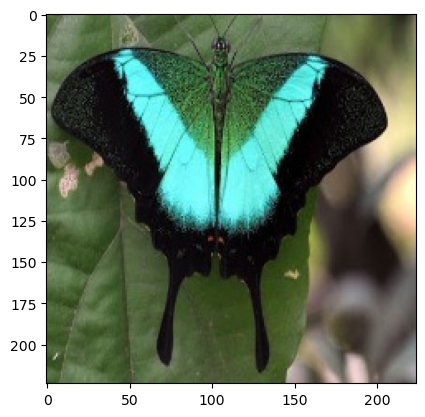

In [35]:
img = load_img('./Dataset/test/BANDED PEACOCK/2.jpg', target_size=(224, 224))
x = img_to_array(img)

x = x* 1.0/255.0

x = np.expand_dims(x, axis=0)

plt.figure()
plt.imshow(img)
plt.show()

In [36]:
test_image_pred2 = model.predict(x)
test_image_pred2 = np.argmax(test_image_pred2, axis=1)
test_image_pred2

1/1 [==============================] - 0s 140ms/step


array([9], dtype=int64)

In [ ]:
import tensorflow as tf
tf.keras.applications.inception_v3.decode_predictions(
    test_image_pred2, top=5
)